# The purpose is to show the Pickles UVK

## Definitions of the libraries

In [17]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
import astropy
from astropy.io import fits
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

In [19]:
import pandas as pd
import os
import re

In [20]:
from astroquery.simbad import Simbad

In [21]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [22]:
top_pysynphot_data_dir=os.environ['PYSYN_CDBS']

In [23]:
import pysynphot as S
S.primary_area=6*1e4
S.binning=10.

## Defines where are the data

In [24]:
dir_star='calspec'
dir_nostar='grid'

In [25]:
dir_submodels=['agn','bpgs','extinction','jacobi','phoenix','bc95','bz77','galactic',\
               'k93models','pickles','bkmodels','ck04models','gunnstryker','kc96']

## where are the files

In [26]:
SEDfile_dir=os.path.join(top_pysynphot_data_dir,dir_nostar,dir_submodels[9],'dat_uvk')

In [27]:
filelist=os.listdir(SEDfile_dir) 

In [28]:
fits_files = [f for f in os.listdir(SEDfile_dir) if f.endswith('.fits')]

In [29]:
fits_files

['pickles_uk_53.fits',
 'pickles_uk_12.fits',
 'pickles_uk_124.fits',
 'pickles_uk_6.fits',
 'pickles_uk_45.fits',
 'pickles_uk_108.fits',
 'pickles_uk_86.fits',
 'pickles_uk_69.fits',
 'pickles_uk_90.fits',
 'pickles_uk_28.fits',
 'pickles_uk_128.fits',
 'pickles_uk_49.fits',
 'pickles_uk_104.fits',
 'pickles_uk_32.fits',
 'pickles_uk_65.fits',
 'pickles_uk_73.fits',
 'pickles_uk_112.fits',
 'pickles_uk_24.fits',
 'pickles_uk_113.fits',
 'pickles_uk_25.fits',
 'pickles_uk_72.fits',
 'pickles_uk_64.fits',
 'pickles_uk_105.fits',
 'pickles_uk_33.fits',
 'pickles_uk_48.fits',
 'pickles_uk_129.fits',
 'pickles_uk_29.fits',
 'pickles_uk_91.fits',
 'pickles_uk_87.fits',
 'pickles_uk_68.fits',
 'pickles_uk_109.fits',
 'pickles_uk_44.fits',
 'pickles_uk_7.fits',
 'pickles_uk_13.fits',
 'pickles_uk_125.fits',
 'pickles_uk_52.fits',
 'pickles_uk_59.fits',
 'pickles_uk_18.fits',
 'pickles_uk_102.fits',
 'pickles_uk_34.fits',
 'pickles_uk_63.fits',
 'pickles_uk_75.fits',
 'pickles_uk_114.fits',
 

In [30]:
fits_files.remove('pickles_uk.fits')

## Find the star-names in the files

In [31]:
obj_headers = []
obj_files = []
for filename in fits_files:
    index=0
    if re.search('fits',filename):  #example of filename filter
        index+=1
        fullfilename = os.path.join(SEDfile_dir,filename)
        hdr = fits.getheader(fullfilename)
        obj_headers.append(hdr)
        obj_files.append(filename)

In [32]:
obj_headers[0]

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                   16 / Bits per pixel                                 
NAXIS   =                    0 / Number of axes                                 
EXTEND  =                    T / File may contain extensions                    
DATE    = '2007-01-11T21:02:21' / Date FITS file was generated                  
IRAF-TLM= '16:02:37 (11/01/2007)' / Time of last modification                   
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
ORIGIN  = 'STScI-STSDAS/TABLES' / Tables version 2002-02-22                     
FILENAME= 'pickles_uk_53.fits' / name of file                                   
NEXTEND =                    1 / number of extensions in file                   
COMMENT1= 'spectral type: G0IV'                                                 
COMMENT2= 'metallicity: sola

In [33]:
#obj_names = []
#index=0
#for hdr in obj_headers: 
#        obj_name=obj_headers[index]['TARGETID']
#        obj_names.append(obj_name)
#        index+=1

In [34]:
#obj_names

In [35]:
fits_files[:5]

['pickles_uk_53.fits',
 'pickles_uk_12.fits',
 'pickles_uk_124.fits',
 'pickles_uk_6.fits',
 'pickles_uk_45.fits']

In [36]:
obj_names2 = []
index=0
for thefile in fits_files:
    #thenames=re.findall('^bk_([a-z][0-9]+).fits$',thefile)
    thenames=re.findall('^(.*).fits$',thefile) 
    if(len(thenames)>0):
        obj_names2.append(thenames[0])
    else:
        print 'bad file ',thefile
    index+=1

In [37]:
print obj_names2

['pickles_uk_53', 'pickles_uk_12', 'pickles_uk_124', 'pickles_uk_6', 'pickles_uk_45', 'pickles_uk_108', 'pickles_uk_86', 'pickles_uk_69', 'pickles_uk_90', 'pickles_uk_28', 'pickles_uk_128', 'pickles_uk_49', 'pickles_uk_104', 'pickles_uk_32', 'pickles_uk_65', 'pickles_uk_73', 'pickles_uk_112', 'pickles_uk_24', 'pickles_uk_113', 'pickles_uk_25', 'pickles_uk_72', 'pickles_uk_64', 'pickles_uk_105', 'pickles_uk_33', 'pickles_uk_48', 'pickles_uk_129', 'pickles_uk_29', 'pickles_uk_91', 'pickles_uk_87', 'pickles_uk_68', 'pickles_uk_109', 'pickles_uk_44', 'pickles_uk_7', 'pickles_uk_13', 'pickles_uk_125', 'pickles_uk_52', 'pickles_uk_59', 'pickles_uk_18', 'pickles_uk_102', 'pickles_uk_34', 'pickles_uk_63', 'pickles_uk_75', 'pickles_uk_114', 'pickles_uk_22', 'pickles_uk_55', 'pickles_uk_14', 'pickles_uk_122', 'pickles_uk_43', 'pickles_uk_38', 'pickles_uk_80', 'pickles_uk_96', 'pickles_uk_79', 'pickles_uk_118', 'pickles_uk_119', 'pickles_uk_97', 'pickles_uk_78', 'pickles_uk_81', 'pickles_uk_39', 

In [38]:
obj_names=obj_names2

In [39]:
print obj_files

['pickles_uk_53.fits', 'pickles_uk_12.fits', 'pickles_uk_124.fits', 'pickles_uk_6.fits', 'pickles_uk_45.fits', 'pickles_uk_108.fits', 'pickles_uk_86.fits', 'pickles_uk_69.fits', 'pickles_uk_90.fits', 'pickles_uk_28.fits', 'pickles_uk_128.fits', 'pickles_uk_49.fits', 'pickles_uk_104.fits', 'pickles_uk_32.fits', 'pickles_uk_65.fits', 'pickles_uk_73.fits', 'pickles_uk_112.fits', 'pickles_uk_24.fits', 'pickles_uk_113.fits', 'pickles_uk_25.fits', 'pickles_uk_72.fits', 'pickles_uk_64.fits', 'pickles_uk_105.fits', 'pickles_uk_33.fits', 'pickles_uk_48.fits', 'pickles_uk_129.fits', 'pickles_uk_29.fits', 'pickles_uk_91.fits', 'pickles_uk_87.fits', 'pickles_uk_68.fits', 'pickles_uk_109.fits', 'pickles_uk_44.fits', 'pickles_uk_7.fits', 'pickles_uk_13.fits', 'pickles_uk_125.fits', 'pickles_uk_52.fits', 'pickles_uk_59.fits', 'pickles_uk_18.fits', 'pickles_uk_102.fits', 'pickles_uk_34.fits', 'pickles_uk_63.fits', 'pickles_uk_75.fits', 'pickles_uk_114.fits', 'pickles_uk_22.fits', 'pickles_uk_55.fits',

In [40]:
objames_and_objfiles = zip(obj_names, obj_files)

## Make a dictionary of filenames

In [41]:
OBJDict= {}
for obj,thefile in objames_and_objfiles:
    print obj,': '
    OBJDict[obj]=thefile
    print OBJDict[obj] 

pickles_uk_53 : 
pickles_uk_53.fits
pickles_uk_12 : 
pickles_uk_12.fits
pickles_uk_124 : 
pickles_uk_124.fits
pickles_uk_6 : 
pickles_uk_6.fits
pickles_uk_45 : 
pickles_uk_45.fits
pickles_uk_108 : 
pickles_uk_108.fits
pickles_uk_86 : 
pickles_uk_86.fits
pickles_uk_69 : 
pickles_uk_69.fits
pickles_uk_90 : 
pickles_uk_90.fits
pickles_uk_28 : 
pickles_uk_28.fits
pickles_uk_128 : 
pickles_uk_128.fits
pickles_uk_49 : 
pickles_uk_49.fits
pickles_uk_104 : 
pickles_uk_104.fits
pickles_uk_32 : 
pickles_uk_32.fits
pickles_uk_65 : 
pickles_uk_65.fits
pickles_uk_73 : 
pickles_uk_73.fits
pickles_uk_112 : 
pickles_uk_112.fits
pickles_uk_24 : 
pickles_uk_24.fits
pickles_uk_113 : 
pickles_uk_113.fits
pickles_uk_25 : 
pickles_uk_25.fits
pickles_uk_72 : 
pickles_uk_72.fits
pickles_uk_64 : 
pickles_uk_64.fits
pickles_uk_105 : 
pickles_uk_105.fits
pickles_uk_33 : 
pickles_uk_33.fits
pickles_uk_48 : 
pickles_uk_48.fits
pickles_uk_129 : 
pickles_uk_129.fits
pickles_uk_29 : 
pickles_uk_29.fits
pickles_uk_91 

## Plot the SED

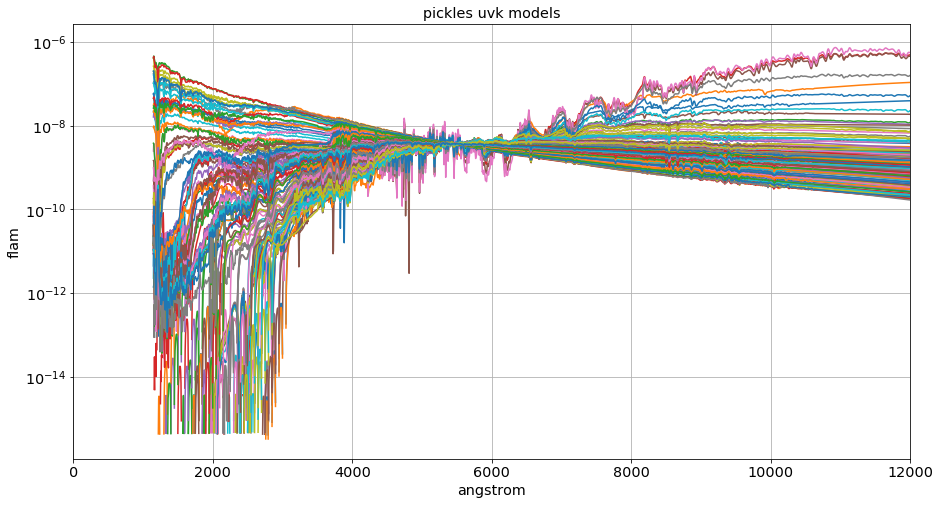

In [42]:
for keyobj in OBJDict:
    the_file=OBJDict[keyobj]
        
    selected_file=the_file
    selected_fullfile=os.path.join(SEDfile_dir,selected_file)
        
    sed=S.FileSpectrum(selected_fullfile)
        
    plt.semilogy(sed.wave,sed.flux,label=keyobj)
    plt.xlim(0, 12000)
    #plt.ylim(1e-23, 1e-6)
    plt.xlabel(sed.waveunits)
    plt.ylabel(sed.fluxunits)
    plt.grid(True)
    #plt.legend(loc='best')
#    plt.title(os.path.basename(S.Vega.name))
    plt.title("pickles uvk models")
    plt.savefig("pickles-uvk.png")